In [1]:
import sys
sys.path.append("../Simulations/")

import numpy as np
import matplotlib.pyplot as plt
from tqdm import *
from scipy.integrate import nquad, quad
from scipy.interpolate import interp1d
from scipy.special import erf, jn, jv, kn
import mpmath as mp
from skmonaco import mcimport, mcquad, mcmiser
from pylab import rcParams
import matplotlib as mpl

from units import *
from spec_calc import PowerSpectra, PowerSpectraPopulations

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
mpl.rcParams['axes.linewidth'] = 1. #set the value globally

In [3]:
pspec = PowerSpectra(precompute=['NFW', 'Burk'])

Loading Burkert parameters
Loading NFW parameters


# Single subhalo

In [4]:
l_min = 1
l_max = 500
n_l = 50
l_ary = np.logspace(np.log10(l_min), np.log10(l_max), n_l)

In [5]:
M0 = 10**8*M_s
R0 = pspec.R0_VL(M0)
Dl = 10*kpc
v = 1e-3

In [6]:
Cl_NFW_ary = np.array([pspec.Cl_NFW(M0, Dl, v, l) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_Burk_ary = np.array([pspec.Cl_Burk(M0, Dl, v, l) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_tNFW_ary = np.array([pspec.Cl_tNFW(M0, Dl, v, l, tau=15) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_tNFW2_ary = np.array([pspec.Cl_tNFW(M0, Dl, v, l, tau=10) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2

In [7]:
Cl_Plummer_ary = pspec.Cl_Plummer(R0, M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;
Cl_Gauss_ary = pspec.Cl_Gauss(R0, M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;
Cl_Point_ary = pspec.Cl_Point(M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;

/scratch/sm8383/anaconda3/envs/venv_smsharma/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/scratch/sm8383/anaconda3/envs/venv_smsharma/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/scratch/sm8383/anaconda3/envs/venv_smsharma/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/scratch/sm8383/anaconda3/envs/venv_smsharma/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


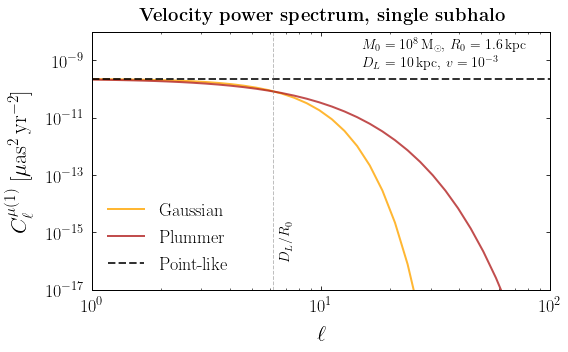

In [8]:
plt.figure(figsize=(8,5))

plt.plot(l_ary, Cl_Gauss_ary, label="Gaussian", alpha=0.8, c='orange')
plt.plot(l_ary, Cl_Plummer_ary, label="Plummer", alpha=0.8, color='firebrick')
plt.plot(l_ary, len(l_ary)*[Cl_Point_ary], label="Point-like", c='k', ls='--', alpha=0.8)

plt.axvline((1/(R0/Dl)), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(R0/Dl)) + .5,1e-15,'$D_L/R_0$',rotation=90, fontsize=14)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\mu (1)}$ [$\mu$as$^2$\,yr$^{-2}$]")


plt.xlim(l_min, 100)
plt.ylim(1e-17,1e-8)

plt.title('\\textbf{Velocity power spectrum, single subhalo}', fontsize=18.5, y=1.02)
plt.text(15, 2.3e-9,'$M_0 = 10^8\,$M$_\odot$, $R_0$ = ' + str(R0/kpc)[:3] + '\,kpc', fontsize=14)
plt.text(15, 5e-10,'$D_L$ = 10\,kpc, $v=10^{-3}$', fontsize=14)


plt.legend(frameon=False)

plt.tight_layout()
plt.savefig("../Plots/mu_single_1.pdf")

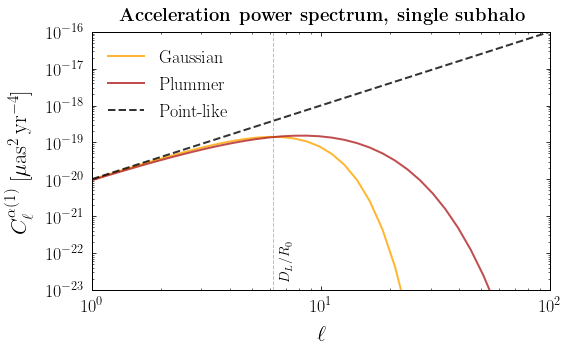

In [9]:
pref = (3/64)*l_ary**2/Dl**2/(1/Year**2)

plt.figure(figsize=(8,5)
          )
plt.plot(l_ary, pref*Cl_Gauss_ary, label="Gaussian", alpha=0.8, c='orange')
plt.plot(l_ary, pref*Cl_Plummer_ary, label="Plummer", alpha=0.8, color='firebrick')
plt.plot(l_ary, pref*np.array(len(l_ary)*[Cl_Point_ary]), label="Point-like", c='k', ls='--', alpha=0.8)

plt.axvline((1/(R0/Dl)), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(R0/Dl)) + .5,1e-22,'$D_L/R_0$',rotation=90, fontsize=14)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\\alpha (1)}$ [$\mu$as$^2$\,yr$^{-4}$]")


plt.xlim(l_min, 100)
plt.ylim(1e-23,1e-16)

plt.title('\\textbf{Acceleration power spectrum, single subhalo}', fontsize=18.5, y=1.02)

plt.legend(frameon=False)

plt.tight_layout()
plt.savefig("../Plots/alpha_single_1.pdf")

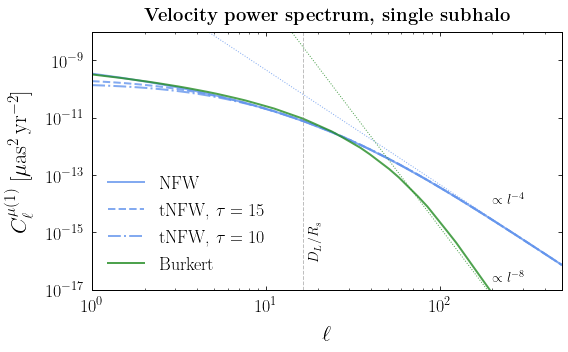

In [10]:
plt.figure(figsize=(8,5))

plt.plot(l_ary, Cl_NFW_ary, label="NFW", alpha=0.8, c='cornflowerblue')
plt.plot(l_ary, Cl_tNFW_ary, label="tNFW, $\\tau = 15$", alpha=0.8, ls='--', c='cornflowerblue')
plt.plot(l_ary, Cl_tNFW2_ary, label="tNFW, $\\tau = 10$", alpha=0.8, ls='-.', c='cornflowerblue')
plt.plot(l_ary, Cl_Burk_ary, label="Burkert", alpha=0.8,c='forestgreen')

n = 4
plt.plot(l_ary, (1/l_ary**n)*Cl_NFW_ary[-1]/(1/(l_ary**n)[-1]), lw=1, alpha=0.8, ls='dotted', c='cornflowerblue')

n = 8
l_base = 2000
fac = pspec.Cl_Burk(M0, Dl, v, l_base)/(1e-6*asctorad/Year)**2/(1/(l_base**n))
plt.plot(l_ary, (1/l_ary**n)*fac, lw=1, alpha=0.8, ls='dotted',c='forestgreen')

plt.text(200, 1e-14,'$\propto l^{-4}$', fontsize=14)
plt.text(200, 2e-17,'$\propto l^{-8}$', fontsize=14)

plt.axvline(1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl)) + 1.5,1e-15,'$D_L/R_s$',rotation=90, fontsize=14)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\mu (1)}$ [$\mu$as$^2$\,yr$^{-2}$]")


plt.xlim(l_min, 500)
plt.ylim(1e-17,1e-8)

plt.title('\\textbf{Velocity power spectrum, single subhalo}', fontsize=18.5, y=1.02)

plt.legend(frameon=False)

plt.tight_layout()
plt.savefig("../Plots/mu_single_2.pdf")

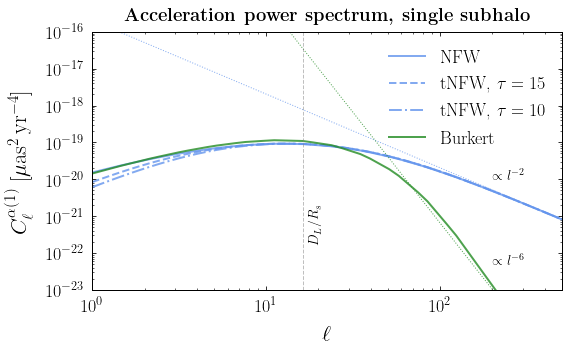

In [11]:
plt.figure(figsize=(8,5))

plt.plot(l_ary, pref*Cl_NFW_ary, label="NFW", alpha=0.8, c='cornflowerblue')
plt.plot(l_ary, pref*Cl_tNFW_ary, label="tNFW, $\\tau = 15$", alpha=0.8, ls='--', c='cornflowerblue')
plt.plot(l_ary, pref*Cl_tNFW2_ary, label="tNFW, $\\tau = 10$", alpha=0.8, ls='-.', c='cornflowerblue')
plt.plot(l_ary, pref*Cl_Burk_ary, label="Burkert", alpha=0.8,c='forestgreen')

n = 4 # is actually n + 2 
plt.plot(l_ary, (1/l_ary**n)*pref*Cl_NFW_ary[-1]/(1/(l_ary**n)[-1]), lw=1, alpha=0.8, ls='dotted', c='cornflowerblue')

n = 8 # is actually n + 2 
l_base = 2000
fac = pref*pspec.Cl_Burk(M0, Dl, v, l_base)/(1e-6*asctorad/Year)**2/(1/(l_base**n))
plt.plot(l_ary, (1/l_ary**n)*fac, lw=1, alpha=0.8, ls='dotted',c='forestgreen')

plt.text(200, 1e-20,'$\propto l^{-2}$', fontsize=14)
plt.text(200, 5e-23,'$\propto l^{-6}$', fontsize=14)

plt.axvline(1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl)) + 1.5,1e-21,'$D_L/R_s$',rotation=90, fontsize=14)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\\alpha (1)}$ [$\mu$as$^2$\,yr$^{-4}$]")


plt.xlim(l_min, 500)
plt.ylim(1e-23,1e-16)

plt.title('\\textbf{Acceleration power spectrum, single subhalo}', fontsize=18.5, y=1.02)

plt.legend(frameon=False)

plt.tight_layout()
plt.savefig("../Plots/alpha_single_2.pdf")

# Populations

In [12]:
pspecpop = PowerSpectraPopulations()

Loading Burkert parameters
Loading NFW parameters
Calculating velocity integrals


In [13]:
pspecpop.set_radial_distribution(pspecpop.r2rho_V_ein_EAQ, R_min=1e-3*kpc, R_max=260*kpc)
pspecpop.set_mass_distribution(pspecpop.rho_M_SI, M_min=1e-6*M_s, M_max=0.04*1.1e12*M_s, 
                               M_min_calib=1e8*M_s, M_max_calib=1e10*M_s, N_calib=150, alpha=-1.9)
pspecpop.set_subhalo_properties(pspecpop.c200_Moline)

pspecpop.get_C_l_total_ary();

## Differential Power

### Over masses

In [14]:
logM_min_plot = 6
logM_max_plot = 12

M_ary = np.logspace(logM_min_plot,logM_max_plot,100)*M_s

ell = 10
dlogC_l_dM_ary_10 = np.array([pspecpop.dC_l_dM_total(ell, M)/pspecpop.C_l_ary[ell] for M in tqdm_notebook(M_ary)])
ell = 30
dlogC_l_dM_ary_30 = np.array([pspecpop.dC_l_dM_total(ell, M)/pspecpop.C_l_ary[ell] for M in tqdm_notebook(M_ary)])
ell = 100
dlogC_l_dM_ary_100 = np.array([pspecpop.dC_l_dM_total(ell, M)/pspecpop.C_l_ary[ell] for M in tqdm_notebook(M_ary)])

/scratch/sm8383/anaconda3/envs/venv_smsharma/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


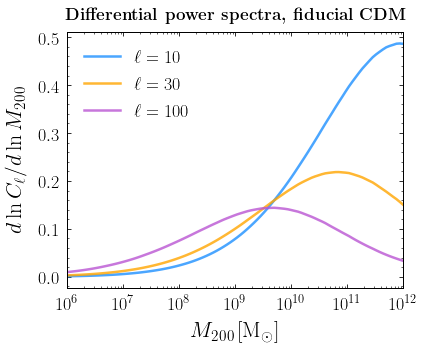

In [15]:
rcParams['figure.figsize'] = 6, 5

alpha_plot = 0.8
lw_plot = 2.5
colors_plot = ['dodgerblue', 'orange', 'mediumorchid']

plt.plot(M_ary/M_s, (M_ary/M_s)*dlogC_l_dM_ary_10/(1/M_s),label="$\ell = 10$", alpha=alpha_plot, lw=lw_plot, color=colors_plot[0])
plt.plot(M_ary/M_s, (M_ary/M_s)*dlogC_l_dM_ary_30/(1/M_s),label="$\ell = 30$", alpha=alpha_plot, lw=lw_plot, color=colors_plot[1])
plt.plot(M_ary/M_s, (M_ary/M_s)*dlogC_l_dM_ary_100/(1/M_s),label="$\ell = 100$", alpha=alpha_plot, lw=lw_plot, color=colors_plot[2])

plt.xlabel("$M_{200}$\,[M$_\odot$]")
plt.ylabel("$d\ln C_\ell/d\ln M_{200}$")

plt.xscale("log")

plt.xlim(10**logM_min_plot, 10**logM_max_plot)

plt.legend(frameon=False)

plt.title('\\textbf{Differential power spectra, fiducial CDM}', y = 1.02, fontsize=17)


plt.tight_layout()
plt.savefig("../Plots/dlnCldlnM200.pdf")

### Over Galactocentric radii

In [16]:
R_min_plot = 1e-2
R_max_plot = 260

R_ary = np.linspace(R_min_plot, R_max_plot, 100)*kpc

ell = 10
dlogC_l_dR_ary_10 = np.array([pspecpop.dC_l_dR_total(ell, R)/pspecpop.C_l_ary[ell] for R in tqdm_notebook(R_ary)])
ell = 30
dlogC_l_dR_ary_30 = np.array([pspecpop.dC_l_dR_total(ell, R)/pspecpop.C_l_ary[ell] for R in tqdm_notebook(R_ary)])
ell = 100
dlogC_l_dR_ary_100 = np.array([pspecpop.dC_l_dR_total(ell, R)/pspecpop.C_l_ary[ell] for R in tqdm_notebook(R_ary)])

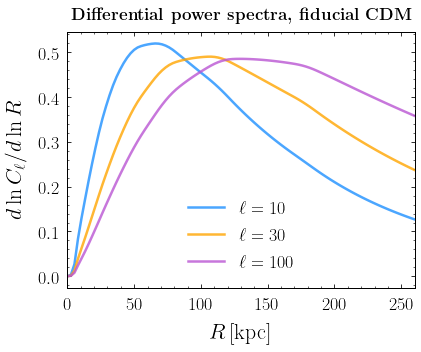

In [17]:
plt.plot(R_ary/kpc, (R_ary/kpc)*dlogC_l_dR_ary_10/(1/kpc),label="$\ell = 10$", alpha=alpha_plot, lw=lw_plot, color=colors_plot[0])
plt.plot(R_ary/kpc, (R_ary/kpc)*dlogC_l_dR_ary_30/(1/kpc),label="$\ell = 30$", alpha=alpha_plot, lw=lw_plot, color=colors_plot[1])
plt.plot(R_ary/kpc, (R_ary/kpc)*dlogC_l_dR_ary_100/(1/kpc),label="$\ell = 100$", alpha=alpha_plot, lw=lw_plot, color=colors_plot[2])

plt.xlabel("$R$\,[kpc]")
plt.ylabel("$d\ln C_\ell/d\ln R$")

plt.xlim(R_min_plot, R_max_plot)

plt.legend(frameon=False)

plt.title('\\textbf{Differential power spectra, fiducial CDM}', y = 1.02, fontsize=17)

plt.tight_layout()
plt.savefig("../Plots/dlnCldlnR.pdf")

## Total signal and noise power spectrum

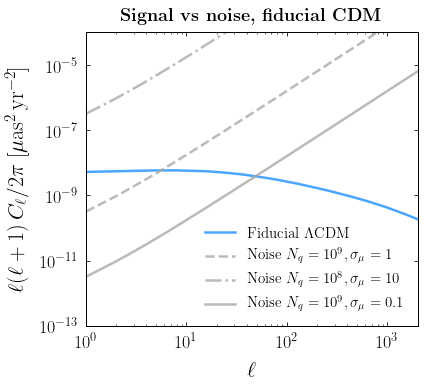

In [18]:
rcParams['figure.figsize'] = 6, 5.5

plt.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*pspecpop.C_l_ary, label="Fiducial $\Lambda$CDM", alpha=alpha_plot, lw=lw_plot, color=colors_plot[0])

sigma_mu = 1
sigma_alpha = .1
N_q = 1e9

plt.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*np.ones_like(pspecpop.l_ary)*sigma_mu**2/N_q, label="Noise $N_q = 10^9, \sigma_\mu=1$", alpha=alpha_plot, lw=lw_plot, color='darkgrey', ls='--')

sigma_mu = 10
sigma_alpha = .1
N_q = 1e8

plt.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*np.ones_like(pspecpop.l_ary)*sigma_mu**2/N_q, label="Noise $N_q = 10^8, \sigma_\mu=10$", alpha=alpha_plot, lw=lw_plot, color='darkgrey', ls='-.')

sigma_mu = 0.1
sigma_alpha = .1
N_q = 1e9

plt.plot(pspecpop.l_ary, (1/(2*np.pi))*pspecpop.l_ary*(pspecpop.l_ary + 1)*np.ones_like(pspecpop.l_ary)*sigma_mu**2/N_q, label="Noise $N_q = 10^9, \sigma_\mu=0.1$", alpha=alpha_plot, lw=lw_plot, color='darkgrey', ls='-')

plt.yscale("log")
plt.xscale("log")

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)\,C_\ell/2\pi$ [$\mu$as$^2$\,yr$^{-2}$]")

plt.xlim(1, 2000)
plt.ylim(1e-13,1e-4)

plt.legend(frameon=False, ncol=1, fontsize=15, loc='lower right')

plt.title('\\textbf{Signal vs noise, fiducial CDM}', y = 1.02, fontsize=18)

plt.tight_layout()
plt.savefig("../Plots/LCDMTheoryNoise.pdf")

# Fisher Forecasts

In [19]:
from astrometry_forecast import Parameter, AstrometryObservation, FisherForecast

In [20]:
sigma_mu = 1
sigma_alpha = .1
N_q = 1e9

In [21]:
fDM_base = 1
dfDM_base = 0.1

Cl_ary_fid = pspecpop.C_l_ary*fDM_base

p = pspecpop.C_l_ary*(fDM_base + dfDM_base)
m = pspecpop.C_l_ary*(fDM_base - dfDM_base)

fDM = Parameter('fDM', fDM_base ,dfDM_base ,None, True, p, m, 
                None, None, '$\\f_\mathrm{DM}$' )

parameters = [Cl_ary_fid, None, 1, 2000, fDM]
observation = AstrometryObservation(fsky=1, sigma_mu=sigma_mu, sigma_alpha=None, N_q=N_q, l_min_mu=10, l_max_mu=300, l_min_alpha=10, l_max_alpha=2000)

fshr = FisherForecast(parameters, observation)
lim = 1.64*np.sqrt(np.linalg.inv(fshr.fshr_cls + fshr.fshr_prior)[0,0])
print(lim)
baseline_sig = fDM_base/fshr.pars_vary[0].sigma
print(baseline_sig)

0.8086447514485171
2.028084640458353


## LCDM discovery significance

In [22]:
sigma_mu_ary = np.logspace(-1,1,50)
N_q_ary = np.logspace(7,10,50)

In [23]:
sig_ary = np.zeros((len(sigma_mu_ary), len(N_q_ary)))

for isigmu, sigmu in enumerate(tqdm_notebook(sigma_mu_ary)):
    for iNq, Nq in enumerate(N_q_ary):
        
        fDM_base = 1
        dfDM_base = 0.1

        Cl_ary_fid = pspecpop.C_l_ary*fDM_base

        p = pspecpop.C_l_ary*(fDM_base + dfDM_base)
        m = pspecpop.C_l_ary*(fDM_base - dfDM_base)

        fDM = Parameter('fDM', fDM_base ,dfDM_base ,None, True, p, m, 
                        None, None, '$\\f_\mathrm{DM}$' )

        parameters = [Cl_ary_fid, None, 1, 2000, fDM]
        observation = AstrometryObservation(fsky=1, sigma_mu=sigmu, sigma_alpha=None, N_q=Nq, l_min_mu=10, l_max_mu=300, l_min_alpha=10, l_max_alpha=2000)

        fshr = FisherForecast(parameters, observation)
        lim = 1.64*np.sqrt(np.linalg.inv(fshr.fshr_cls + fshr.fshr_prior)[0,0])
        sig_ary[isigmu, iNq] = fDM_base/fshr.pars_vary[0].sigma

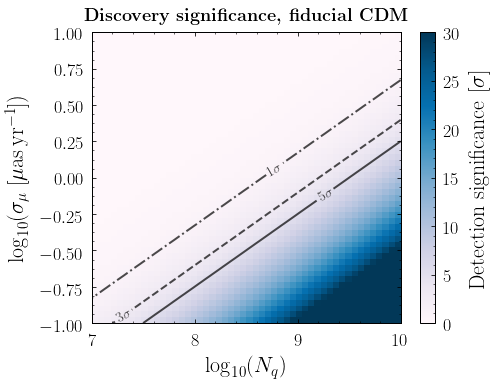

In [24]:
rcParams['figure.figsize'] = 7, 5.5

levels = [1,3,5]
X, Y = np.meshgrid(np.log10(N_q_ary), np.log10(sigma_mu_ary))

fig, ax = plt.subplots()

CS = ax.contour(X, Y, sig_ary, levels = levels, linestyles=['-.','--','-'], colors='k', linewidths=2, alpha=0.7)

fmt = {}
strs = ['1$\sigma$', '3$\sigma$', '5$\sigma$']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
    
im = ax.imshow(sig_ary,cmap = 'PuBu', aspect='auto', origin='lower', extent=[7,10,-1,1], vmin=0, vmax=30)

ax.clabel(CS, fmt=fmt,inline=1, fontsize=14)

ax.set_xlabel("$\log_{10}(N_q)$")
ax.set_ylabel("$\log_{10}(\sigma_\mu~[\mu$as\,yr$^{-1}$])")
ax.set_title('\\textbf{Discovery significance, fiducial CDM}', y = 1.02, fontsize=18)

cbar = fig.colorbar(im)
cbar.set_label('Detection significance [$\sigma$]')

plt.tight_layout()
plt.savefig("../Plots/LCDM_disc.pdf")

In [25]:
l_min_ary = np.linspace(5,30,50)
l_max_ary = np.linspace(10,100,50)

In [26]:
sig_l_ary = np.zeros((len(l_max_ary), len(l_min_ary)))

for ilmax, lmax in enumerate(tqdm_notebook(l_max_ary)):
    for ilmin, lmin in enumerate((l_min_ary)):
        
        if lmin >= lmax - 1: continue
            
        fDM_base = 1
        dfDM_base = 0.1

        Cl_ary_fid = pspecpop.C_l_ary*fDM_base

        p = pspecpop.C_l_ary*(fDM_base + dfDM_base)
        m = pspecpop.C_l_ary*(fDM_base - dfDM_base)

        fDM = Parameter('fDM', fDM_base ,dfDM_base ,None, True, p, m, 
                        None, None, '$\\f_\mathrm{DM}$' )

        parameters = [Cl_ary_fid, None, 1, 2000, fDM]
        observation = AstrometryObservation(fsky=1, sigma_mu=1, sigma_alpha=None, N_q=1e9, l_min_mu=lmin, l_max_mu=lmax, l_min_alpha=10, l_max_alpha=2000)

        fshr = FisherForecast(parameters, observation)
        lim = 1.64*np.sqrt(np.linalg.inv(fshr.fshr_cls + fshr.fshr_prior)[0,0])
        sig_l_ary[ilmax, ilmin] = fDM_base/fshr.pars_vary[0].sigma

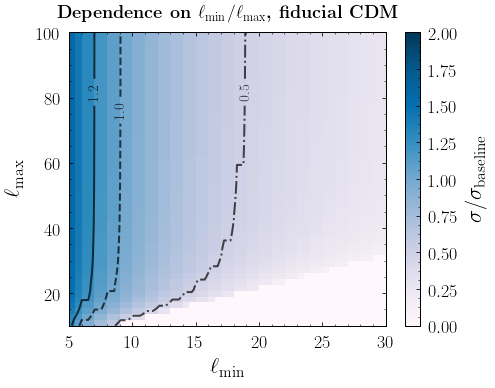

In [27]:
rcParams['figure.figsize'] = 7, 5.5

levels = [0.5,1,1.2]
X, Y = np.meshgrid(l_min_ary, l_max_ary)

fig, ax = plt.subplots()

CS = ax.contour(X, Y, sig_l_ary/baseline_sig, levels = levels, linestyles=['-.','--','-'], colors='k', linewidths=2, alpha=0.7)

fmt = {}
strs = ['0.5','1.0','1.2']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
    
im = ax.imshow(sig_l_ary/baseline_sig,cmap = 'PuBu', aspect='auto', origin='lower', extent=[min(l_min_ary), max(l_min_ary), min(l_max_ary),  max(l_max_ary)], vmin=0., vmax=2)

ax.clabel(CS, fmt=fmt,inline=1, fontsize=14)

ax.set_xlabel("$\ell_\mathrm{min}$")
ax.set_ylabel("$\ell_\mathrm{max}$")
ax.set_title('\\textbf{Dependence on $\ell_\mathrm{min}/\ell_\mathrm{max}$, fiducial CDM}', y = 1.02, fontsize=18)

cbar = fig.colorbar(im)
cbar.set_label('$\sigma$/$\sigma_\mathrm{baseline}$')

plt.tight_layout()
plt.savefig("../Plots/LCDM_lminmax.pdf")


## Compact object limits

In [28]:
pspecpop = PowerSpectraPopulations()

Loading Burkert parameters
Loading NFW parameters
Calculating velocity integrals


In [29]:
pspecpop.set_radial_distribution(pspecpop.r2rho_V_NFW, R_min=1e-3*kpc, R_max=260*kpc)

In [30]:
# sigma_mu = 10
# sigma_alpha = .1
# N_q = 0.0001*4*np.pi*1e9



In [31]:
M_DM_ary = np.logspace(1,14,20)*M_s

In [32]:
f_DM_lim_ary = np.zeros_like(M_DM_ary)

sigma_mu = 1
sigma_alpha = .1
N_q = 1e9

for iDM, M_DM in enumerate(tqdm_notebook(M_DM_ary)):
    pspecpop.set_mass_distribution_compact(M_DM=M_DM, f_DM=1)
    pspecpop.get_C_l_compact_total_ary();


    fDM_base = 0
    dfDM_base = 0.1

    Cl_ary_fid = np.array(pspecpop.C_l_ary)*fDM_base

    p = np.array(pspecpop.C_l_ary)*(fDM_base + dfDM_base)
    m = np.array(pspecpop.C_l_ary)*(fDM_base - dfDM_base)

    fDM = Parameter('fDM', fDM_base ,dfDM_base ,None, True, p, m, 
                    None, None, '$\\f_\mathrm{DM}$' )

    parameters = [Cl_ary_fid, None, 1, 2000, fDM]
    observation = AstrometryObservation(fsky=1, sigma_mu=sigma_mu, sigma_alpha=None, N_q=N_q, l_min_mu=10, l_max_mu=300, l_min_alpha=10, l_max_alpha=2000)

    fshr = FisherForecast(parameters, observation)
    lim = 1.64*np.sqrt(np.linalg.inv(fshr.fshr_cls + fshr.fshr_prior)[0,0])
    f_DM_lim_ary[iDM] = lim

In [33]:
f_DM_lim_2_ary = np.zeros_like(M_DM_ary)

sigma_mu = 10
sigma_alpha = .1
N_q = 1e8

for iDM, M_DM in enumerate(tqdm_notebook(M_DM_ary)):
    pspecpop.set_mass_distribution_compact(M_DM=M_DM, f_DM=1)
    pspecpop.get_C_l_compact_total_ary();


    fDM_base = 0
    dfDM_base = 0.1

    Cl_ary_fid = np.array(pspecpop.C_l_ary)*fDM_base

    p = np.array(pspecpop.C_l_ary)*(fDM_base + dfDM_base)
    m = np.array(pspecpop.C_l_ary)*(fDM_base - dfDM_base)

    fDM = Parameter('fDM', fDM_base ,dfDM_base ,None, True, p, m, 
                    None, None, '$\\f_\mathrm{DM}$' )

    parameters = [Cl_ary_fid, None, 1, 2000, fDM]
    observation = AstrometryObservation(fsky=1, sigma_mu=sigma_mu, sigma_alpha=None, N_q=N_q, l_min_mu=10, l_max_mu=300, l_min_alpha=10, l_max_alpha=2000)

    fshr = FisherForecast(parameters, observation)
    lim = 1.64*np.sqrt(np.linalg.inv(fshr.fshr_cls + fshr.fshr_prior)[0,0])
    f_DM_lim_2_ary[iDM] = lim

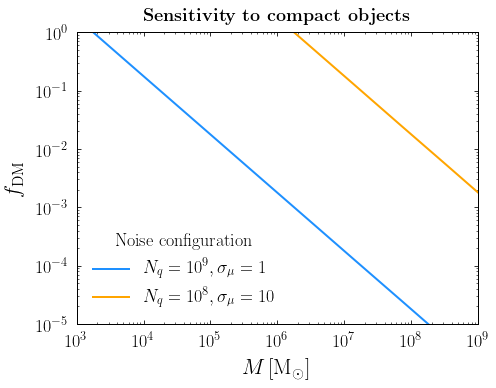

In [34]:
plt.plot(M_DM_ary/M_s, f_DM_lim_ary, label='$N_q = 10^9, \sigma_\mu=1$', color=colors_plot[0])
plt.plot(M_DM_ary/M_s, f_DM_lim_2_ary, label='$N_q = 10^8, \sigma_\mu=10$', color=colors_plot[1])

plt.xscale("log")
plt.yscale("log")

plt.ylim(1e-5,1)
plt.xlim(1e3, 1e9)

plt.xlabel("$M$\,[M$_\odot$]")
plt.ylabel("$f_\mathrm{DM}$")

plt.title('\\textbf{Sensitivity to compact objects}', y = 1.02, fontsize=18)
legend = plt.legend(frameon=False, title="Noise configuration")
plt.setp(legend.get_title(),fontsize=18)

plt.tight_layout()
plt.savefig("../Plots/compact.pdf")

# Theory vs sim

In [73]:
pspecpop.set_radial_distribution(pspecpop.r2rho_V_ein_EAQ, R_min=1e-3*kpc, R_max=260*kpc)
pspecpop.set_mass_distribution(pspecpop.rho_M_SI, M_min=10**6.5*M_s, M_max=0.04*1.1e12*M_s, 
                               M_min_calib=1e8*M_s, M_max_calib=1e10*M_s, N_calib=150, alpha=-1.9)
pspecpop.set_subhalo_properties(pspecpop.c200_SCP)

pspecpop.get_C_l_total_ary();

In [77]:
max_sep = 20
nsim = 200
nside = 128
lmax = 3*nside - 1

In [79]:
Cl_B_ary = np.zeros((nsim, lmax))
for i in tqdm_notebook(range(nsim)):
    Cl_B = np.load("/scratch/sm8383/QuasarSims/lcdm_" + str(i) + ".0.npz")['Cl_B']
    Cl_B_ary[i, :] = Cl_B

In [143]:
Cl_B_plot = np.percentile(Cl_B_ary*1e12, [16,50,84], axis=0)/(2*ell + 1)/(2*np.pi)

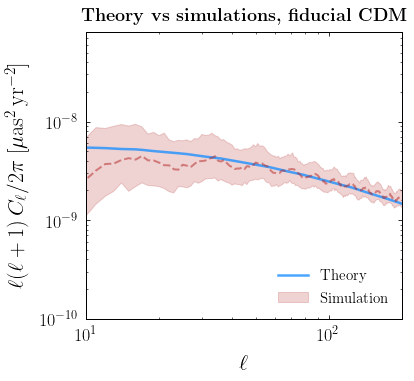

In [155]:
rcParams['figure.figsize'] = 5.8, 5.4

ell = np.arange(1, len(Cl_B_plot[0]) + 1)

plt.plot(pspecpop.l_ary, pspecpop.l_ary*(pspecpop.l_ary + 1)*1.4*pspecpop.C_l_ary/(2*np.pi), alpha=alpha_plot, lw=lw_plot, color='dodgerblue', label="Theory")

plt.plot(ell, ell*(ell + 1)*Cl_B_plot[1], ls='--', color='firebrick', alpha=0.5)
plt.fill_between(ell, ell*(ell + 1)*Cl_B_plot[0],ell*(ell + 1)*Cl_B_plot[2], alpha=0.2, color='firebrick', label="Simulation")

plt.legend(frameon=False, ncol=1, fontsize=15, loc='lower right')

plt.title('\\textbf{Theory vs simulations, fiducial CDM}', y = 1.02, fontsize=18)

plt.xscale("log")
plt.yscale("log")

plt.xlim(10,200)
plt.ylim(1e-10,8e-8)

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)\,C_\ell/2\pi$ [$\mu$as$^2$\,yr$^{-2}$]")


plt.tight_layout()
plt.savefig("../Plots/TheoryvsSim.pdf")